In [23]:
#### Ethnicity
import pandas as pd
import sqlite3
from contextlib import closing
import psycopg2

nct_id_list = ['NCT02391350', 'NCT02355275', 'NCT00285649', 'NCT01362049', 'NCT03644927', 'NCT00939107', 'NCT01312233', 'NCT01221233', 'NCT02308189', 'NCT00118430', 'NCT01918189', 'NCT02353442', 'NCT03504085', 'NCT03502187', 'NCT01559948', 'NCT02327325', 'NCT02469077', 'NCT00786864', 'NCT02503410', 'NCT03415464', 'NCT02132910', 'NCT03816007', 'NCT01726803', 'NCT01841216', 'NCT03554746', 'NCT02027623', 'NCT03046472', 'NCT02864732', 'NCT02524158', 'NCT00561652', 'NCT02122445', 'NCT03484403', 'NCT01539863', 'NCT01653782', 'NCT03603028', 'NCT02868034', 'NCT03360344', 'NCT04468074', 'NCT00803413', 'NCT03888235', 'NCT04209335', 'NCT01611792', 'NCT02645760', 'NCT02938169', 'NCT01374269']



def extract_aact(nct_ids):
    connection = psycopg2.connect(
        database="aact",
        user= "achang",
        password="AChang2608",
        host="aact-db.ctti-clinicaltrials.org",
    )

    with closing(connection.cursor()) as cursor:
        # Prepare the SQL query with format string for nct_ids
        query = f"""
            SELECT nct_id, result_group_id, ctgov_group_code, param_value, classification, category
            FROM baseline_measurements
            WHERE (title = 'Race (NIH/OMB)' OR title = 'Race/Ethnicity, Customized')
            AND nct_id IN ({', '.join(["'%s'" % id for id in nct_ids])});
        """
        cursor.execute(query)
        patients = cursor.fetchall()

    columns = [
        'nct_id',
        'result_group_id',
        'ctgov_group_code',
        'number',
        'classification',
        'category',
    ]

    df = pd.DataFrame(patients, columns=columns)

    nunique=df['nct_id'].nunique()
    unique_nct_ids = df['nct_id'].unique()
    #print(unique_nct_ids)
    #print(nunique)
    return(df)
    



extracted_race= extract_aact(nct_id_list)
#print(extracted_race)


max_result_group_id = extracted_race.groupby('nct_id')['result_group_id'].transform('max')

# Select rows where 'result_group_id' is equal to the max within its group
filtered_extracted_race = extracted_race[extracted_race['result_group_id'] == max_result_group_id]

print(filtered_extracted_race)

filtered_extracted_race.loc[filtered_extracted_race['category'].isnull(), 'category'] = filtered_extracted_race['classification']

category_mapping = {
    'Black': 'Black or African American',
    'BLACK OR AFRICAN AMERICAN' : 'Black or African American',
    'Black Or African American' : 'Black or African American',
    'ASIAN' : 'Asian',
    'NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER': 'Native Hawaiian or Other Pacific Islander',
    'Native Hawaiian or Pacific Islander':'Native Hawaiian or Other Pacific Islander',
    'White or Caucasian': 'White',
    'AMERICAN INDIAN OR ALASKA NATIVE': 'American Indian or Alaska Native',
    'American Indian Or Alaska Native': 'American Indian or Alaska Native',
    'WHITE': 'White',
    'Unknown': 'Unknown or Not Reported',
    'Missing': 'Unknown or Not Reported',
    'Other': 'Unknown or Not Reported',
    'OTHER' : 'Unknown or Not Reported',
    'MISSING': 'Unknown or Not Reported',
    'No ethnicity': 'Unknown or Not Reported',
    'Other, not specified': 'Unknown or Not Reported',
    'Multiple': 'Unknown or Not Reported'
}

categories_to_remove = ["HISPANIC OR LATINO", "NOT HISPANIC OR LATINO","NOT KNOWN, NOT RECORDED, OR REFUSED"]

filtered_extracted_race['category'] = filtered_extracted_race['category'].replace(category_mapping)
filtered_extracted_race = filtered_extracted_race[~filtered_extracted_race['category'].isin(categories_to_remove)]
filtered_extracted_race = filtered_extracted_race.drop('classification', axis=1)
# Specify the file name for your CSV
race = "filtered_extracted_race.csv"

# Save the DataFrame to a CSV file
filtered_extracted_race.to_csv(race, index=False)




          nct_id  result_group_id ctgov_group_code number classification  \
2    NCT02469077         74043122            BG002      0           None   
5    NCT02469077         74043122            BG002      3           None   
8    NCT02469077         74043122            BG002      0           None   
11   NCT02469077         74043122            BG002     25           None   
14   NCT02469077         74043122            BG002     48           None   
..           ...              ...              ...    ...            ...   
505  NCT03504085         74480806            BG002      0           None   
508  NCT03504085         74480806            BG002     10           None   
511  NCT03504085         74480806            BG002     31           None   
514  NCT03504085         74480806            BG002      0           None   
517  NCT03504085         74480806            BG002      0           None   

                                      category  
2             American Indian or Alask

/var/folders/64/x7_jk0ds5174rzhfbs9sv8b80000gn/T/ipykernel_45902/239492741.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_extracted_race['category'] = filtered_extracted_race['category'].replace(category_mapping)


In [24]:
num_unique_values = filtered_extracted_race['category'].nunique()
print(f"Number of unique values in 'category': {num_unique_values}")

# Print out the unique values in the 'category' column
unique_values = filtered_extracted_race['category'].unique()
print("Unique values in 'category':")
print(unique_values)

Number of unique values in 'category': 26
Unique values in 'category':
['American Indian or Alaska Native' 'Asian'
 'Native Hawaiian or Other Pacific Islander' 'Black or African American'
 'White' 'More than one race' 'Unknown or Not Reported'
 'American Indian or Alaskan Native' 'Asian or Pacific Islander'
 'Nonhispanic Black' 'Hispanic' 'Nonhispanic White' 'Caucasian'
 'African American' 'Asian/Pacific' 'Amer. Indian/Alaska Native'
 'Multi-racial' 'African American/Black' 'Caucasian/White'
 'Hispanic or Latino' 'Hispanic/Latino' 'Hispaic' 'Caucasian or White'
 'Latino/Hispanic' 'Non-Hispanic' 'Mixed']


nct_ids in the list but not in the extracted data: {'NCT02034916', 'NCT00679783'}
2 studies no ethnicities

nct_ids in the list but not in the extracted data: {'NCT03343054', 'NCT01818063', 'NCT02734004', 'NCT02657889', 'NCT01905592', 'NCT04690855', 'NCT01506609'}

1st study: Age, customized in title, : <18,18-44, 45-64, >65 in classification
2nd study: Age, categorical in title, , <18, 18-65, >65, in category
3rd study: Age, categorical in title, <18, 18-65, >65, in category
4th study: Age, categorical in title:  as above
5th study: Age, customized: 18-64, 65-74, >75 in category
6th study: Age, categorical in title in category
7t study: Age, customized, <45, 45-64, >65 in category






In [25]:
### Age with custom and categorical
nct_id_list = ['NCT02391350', 'NCT02355275', 'NCT00285649', 'NCT01362049', 'NCT03644927', 'NCT00939107', 'NCT01312233', 'NCT01221233', 'NCT02308189', 'NCT00118430', 'NCT01918189', 'NCT02353442', 'NCT03504085', 'NCT03502187', 'NCT01559948', 'NCT02327325', 'NCT02469077', 'NCT00786864', 'NCT02503410', 'NCT03415464', 'NCT02132910', 'NCT03816007', 'NCT01726803', 'NCT01841216', 'NCT03554746', 'NCT02027623', 'NCT03046472', 'NCT02864732', 'NCT02524158', 'NCT00561652', 'NCT02122445', 'NCT03484403', 'NCT01539863', 'NCT01653782', 'NCT03603028', 'NCT02868034', 'NCT03360344', 'NCT04468074', 'NCT00803413', 'NCT03888235', 'NCT04209335', 'NCT01611792', 'NCT02645760', 'NCT02938169', 'NCT01374269']


def extract_aact_age_extra(nct_ids):
    connection = psycopg2.connect(
        database="aact",
        user= "achang",
        password="AChang2608",
        host="aact-db.ctti-clinicaltrials.org",
    )

    with closing(connection.cursor()) as cursor:
        query = f"""
        SELECT m.nct_id, m.result_group_id, m.classification, m.category, m.title, m.param_value, b.count, m.dispersion_type, m.dispersion_value
        FROM baseline_measurements m
        LEFT JOIN baseline_counts b on m.result_group_id=b.result_group_id
        WHERE (title = 'Age, Continuous')
        AND m.nct_id IN ({', '.join(["'%s'" % id for id in nct_ids])});;
        """
        cursor.execute(query)
        patients = cursor.fetchall()
        
        columns = [
        'nct_id',
        'result_group_id',
        'classification',
        'category',
        'title',
        'number',
        'total_count',
        'dispersion_type',
        'dispersion_value'
    ]

    df = pd.DataFrame(patients, columns=columns)

    nunique=df['nct_id'].nunique()
    unique_nct_ids = df['nct_id'].unique()
    #print(unique_nct_ids)
    print(nunique)
    return(df)
    


extracted_age_extra= extract_aact_age_extra(nct_id_list)
print(extracted_age_extra)


max_result_group_id = extracted_age_extra.groupby('nct_id')['result_group_id'].transform('max')

# Select rows where 'result_group_id' is equal to the max within its group
filtered_extracted_age_extra = extracted_age_extra[extracted_age_extra['result_group_id'] == max_result_group_id]

# Specify the file name for your CSV
age_extra = "filtered_extracted_age_extra.csv"

# Save the DataFrame to a CSV file
filtered_extracted_age_extra.to_csv(age_extra, index=False)


39
          nct_id  result_group_id classification category            title  \
0    NCT02353442         74045023           None     None  Age, Continuous   
1    NCT02645760         74353402           None     None  Age, Continuous   
2    NCT03502187         74658909           None     None  Age, Continuous   
3    NCT03502187         74658911           None     None  Age, Continuous   
4    NCT02027623         74071524           None     None  Age, Continuous   
..           ...              ...            ...      ...              ...   
122  NCT02864732         74474654           None     None  Age, Continuous   
123  NCT02864732         74474655           None     None  Age, Continuous   
124  NCT03888235         74479282           None     None  Age, Continuous   
125  NCT03888235         74479283           None     None  Age, Continuous   
126  NCT03504085         74480805           None     None  Age, Continuous   

    number  total_count     dispersion_type dispersion_value

In [26]:
# Ensure that 'number' and 'total_count' columns are numeric
filtered_extracted_age_extra['number'] = pd.to_numeric(filtered_extracted_age_extra['number'], errors='coerce')
filtered_extracted_age_extra['total_count'] = pd.to_numeric(filtered_extracted_age_extra['total_count'], errors='coerce')

# Calculate the product
filtered_extracted_age_extra['product'] = filtered_extracted_age_extra['number'] * filtered_extracted_age_extra['total_count']

# Calculate the sum of the product
total_sum = filtered_extracted_age_extra['product'].sum()

# Calculate the sum of 'total_count'
total_participants = filtered_extracted_age_extra['total_count'].sum()

# Calculate the average age
# Check if total_participants is not zero to avoid division by zero
if total_participants != 0:
    average_age = total_sum / total_participants
    print("Average Age:", average_age)
else:
    print("Total number of participants is zero, cannot compute average age.")

Average Age: 44.61001597018898


/var/folders/64/x7_jk0ds5174rzhfbs9sv8b80000gn/T/ipykernel_45902/147986295.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_extracted_age_extra['number'] = pd.to_numeric(filtered_extracted_age_extra['number'], errors='coerce')
/var/folders/64/x7_jk0ds5174rzhfbs9sv8b80000gn/T/ipykernel_45902/147986295.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_extracted_age_extra['total_count'] = pd.to_numeric(filtered_extracted_age_extra['total_count'], errors='coerce')
/var/folders/64/x7_jk0ds

/var/folders/64/x7_jk0ds5174rzhfbs9sv8b80000gn/T/ipykernel_45902/317986369.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_extracted_age_extra['number'] = pd.to_numeric(filtered_extracted_age_extra['number'], errors='coerce')
/var/folders/64/x7_jk0ds5174rzhfbs9sv8b80000gn/T/ipykernel_45902/317986369.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_extracted_age_extra['total_count'] = pd.to_numeric(filtered_extracted_age_extra['total_count'], errors='coerce')
/var/folders/64/x7_jk0d

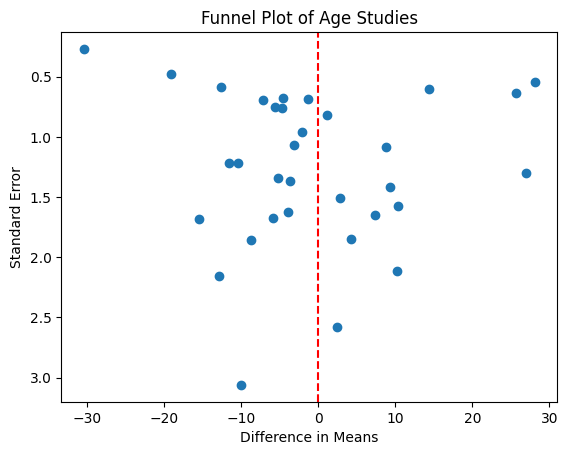

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


filtered_extracted_age_extra

# Convert columns to appropriate types
filtered_extracted_age_extra['number'] = pd.to_numeric(filtered_extracted_age_extra['number'], errors='coerce')
filtered_extracted_age_extra['total_count'] = pd.to_numeric(filtered_extracted_age_extra['total_count'], errors='coerce')
filtered_extracted_age_extra['dispersion_value'] = pd.to_numeric(filtered_extracted_age_extra['dispersion_value'], errors='coerce')

# Filter rows where necessary data is available
filtered_extracted_age_extra = filtered_extracted_age_extra[filtered_extracted_age_extra['dispersion_type'] == 'Standard Deviation']
filtered_extracted_age_extra= filtered_extracted_age_extra.dropna(subset=['number', 'total_count', 'dispersion_value'])

# Calculate difference in means and standard error
overall_mean = (total_sum/total_participants)
filtered_extracted_age_extra['difference_in_means'] = filtered_extracted_age_extra['number'] - overall_mean
filtered_extracted_age_extra['standard_error'] = filtered_extracted_age_extra['dispersion_value'] / np.sqrt(filtered_extracted_age_extra['total_count'])

# Create funnel plot
plt.scatter(filtered_extracted_age_extra['difference_in_means'], filtered_extracted_age_extra['standard_error'])
plt.xlabel('Difference in Means')
plt.ylabel('Standard Error')
plt.title('Funnel Plot of Age Studies')
plt.axvline(x=0, color='red', linestyle='--')
plt.gca().invert_yaxis() # Inverting y-axis for better interpretation of funnel plot
plt.show()


In [28]:
num_unique_values = filtered_extracted_age_extra['nct_id'].nunique()
print(f"Number of unique values in 'category': {num_unique_values}")

# Print out the unique values in the 'category' column
unique_values = filtered_extracted_age_extra['nct_id'].unique()
print("Unique values in 'category':")
print(unique_values)

Number of unique values in 'category': 33
Unique values in 'category':
['NCT02645760' 'NCT01374269' 'NCT01362049' 'NCT02868034' 'NCT03504085'
 'NCT01539863' 'NCT02524158' 'NCT02938169' 'NCT02503410' 'NCT03502187'
 'NCT00118430' 'NCT03484403' 'NCT01653782' 'NCT01611792' 'NCT03888235'
 'NCT03554746' 'NCT01221233' 'NCT02308189' 'NCT03046472' 'NCT02353442'
 'NCT03415464' 'NCT00285649' 'NCT03603028' 'NCT01726803' 'NCT01559948'
 'NCT02027623' 'NCT01918189' 'NCT02391350' 'NCT01312233' 'NCT04468074'
 'NCT02327325' 'NCT03816007' 'NCT02864732']


In [29]:
### trial design

nct_id_list = ['NCT02391350', 'NCT02355275', 'NCT00285649', 'NCT01362049', 'NCT03644927', 'NCT00939107', 'NCT01312233', 'NCT01221233', 'NCT02308189', 'NCT00118430', 'NCT01918189', 'NCT02353442', 'NCT03504085', 'NCT03502187', 'NCT01559948', 'NCT02327325', 'NCT02469077', 'NCT00786864', 'NCT02503410', 'NCT03415464', 'NCT02132910', 'NCT03816007', 'NCT01726803', 'NCT01841216', 'NCT03554746', 'NCT02027623', 'NCT03046472', 'NCT02864732', 'NCT02524158', 'NCT00561652', 'NCT02122445', 'NCT03484403', 'NCT01539863', 'NCT01653782', 'NCT03603028', 'NCT02868034', 'NCT03360344', 'NCT04468074', 'NCT00803413', 'NCT03888235', 'NCT04209335', 'NCT01611792', 'NCT02645760', 'NCT02938169', 'NCT01374269']


def extract_aact_design(nct_ids):
    connection = psycopg2.connect(
        database="aact",
        user= "achang",
        password="AChang2608",
        host="aact-db.ctti-clinicaltrials.org",
    )

    with closing(connection.cursor()) as cursor:
        query = f"""
        SELECT nct_id, allocation, intervention_model, masking, subject_masked, caregiver_masked, investigator_masked, outcomes_assessor_masked
        FROM designs
        WHERE nct_id IN ({', '.join(["'%s'" % id for id in nct_ids])});
        """
        cursor.execute(query)
        patients = cursor.fetchall()
        
        columns = [
        'nct_id',
        'allocation',
        'intervention_model',
        'masking',
        'subject_masked',
        'caregiver_masked',
        'investigator_masked',
        'outcomes_assessor_masked'
    ]

    df = pd.DataFrame(patients, columns=columns)

    nunique=df['nct_id'].nunique()
    unique_nct_ids = df['nct_id'].unique()
    #print(unique_nct_ids)
    print(nunique)
    return(df)
    



extracted_designs= extract_aact_design(nct_id_list)
print(extracted_designs)

# Specify the file name for your CSV
designs = "extracted_designs.csv"

# Save the DataFrame to a CSV file
extracted_designs.to_csv(designs, index=False)




45
         nct_id      allocation       intervention_model            masking  \
0   NCT02868034      Randomized     Factorial Assignment             Double   
1   NCT00118430      Randomized      Parallel Assignment  None (Open Label)   
2   NCT03603028             N/A  Single Group Assignment  None (Open Label)   
3   NCT01221233      Randomized      Parallel Assignment  None (Open Label)   
4   NCT00939107      Randomized     Factorial Assignment             Double   
5   NCT03360344      Randomized      Parallel Assignment             Single   
6   NCT01374269      Randomized      Parallel Assignment             Triple   
7   NCT04468074      Randomized      Parallel Assignment             Single   
8   NCT01312233      Randomized      Parallel Assignment             Single   
9   NCT02864732      Randomized      Parallel Assignment  None (Open Label)   
10  NCT01362049      Randomized      Parallel Assignment             Double   
11  NCT02122445             N/A  Single Group Ass

In [30]:

### interventions

nct_id_list = ['NCT02391350', 'NCT02355275', 'NCT00285649', 'NCT01362049', 'NCT03644927', 'NCT00939107', 'NCT01312233', 'NCT01221233', 'NCT02308189', 'NCT00118430', 'NCT01918189', 'NCT02353442', 'NCT03504085', 'NCT03502187', 'NCT01559948', 'NCT02327325', 'NCT02469077', 'NCT00786864', 'NCT02503410', 'NCT03415464', 'NCT02132910', 'NCT03816007', 'NCT01726803', 'NCT01841216', 'NCT03554746', 'NCT02027623', 'NCT03046472', 'NCT02864732', 'NCT02524158', 'NCT00561652', 'NCT02122445', 'NCT03484403', 'NCT01539863', 'NCT01653782', 'NCT03603028', 'NCT02868034', 'NCT03360344', 'NCT04468074', 'NCT00803413', 'NCT03888235', 'NCT04209335', 'NCT01611792', 'NCT02645760', 'NCT02938169', 'NCT01374269']


def extract_aact_intervention(nct_ids):
    connection = psycopg2.connect(
        database="aact",
        user= "achang",
        password="AChang2608",
        host="aact-db.ctti-clinicaltrials.org",
    )

    with closing(connection.cursor()) as cursor:
        query = f"""
        SELECT d.nct_id, d.intervention_id, i.name, i.description, de.title
        FROM design_group_interventions d
        LEFT JOIN interventions i on d.intervention_id=i.id
        LEFT JOIN design_groups de on de.id=d.design_group_id
        WHERE d.nct_id IN ({', '.join(["'%s'" % id for id in nct_ids])});
        """
        cursor.execute(query)
        patients = cursor.fetchall()
        
        columns = [
        'nct_id',
        'intervention_id',
        'name',
        'description',
        'title'
    ]

    df = pd.DataFrame(patients, columns=columns)

    nunique=df['nct_id'].nunique()
    unique_nct_ids = df['nct_id'].unique()
    #print(unique_nct_ids)
    print(nunique)
    return(df)
    



extracted_intervention= extract_aact_intervention(nct_id_list)
print(extracted_intervention)



# Specify the file name for your CSV
interventions = "extracted_interventions.csv"

# Save the DataFrame to a CSV file
extracted_intervention.to_csv(interventions, index=False)



45
          nct_id  intervention_id                  name  \
0    NCT01312233         73667945          Medical Care   
1    NCT01312233         73667946             Dual Care   
2    NCT01312233         73667947           Shared Care   
3    NCT03360344         74175106  Kinesio 12 inch Tape   
4    NCT03360344         74175107   Kinesio 4 inch Tape   
..           ...              ...                   ...   
124  NCT01221233         73971117            Moist Heat   
125  NCT00118430         74139898          Stepped Care   
126  NCT00118430         74139899       Antidepressants   
127  NCT00118430         74139900            Usual Care   
128  NCT03603028         74140454            Exergaming   

                                           description  \
0    Participants allocated to all three treatment ...   
1    Participants allocated to Dual Care receive me...   
2    Participants allocated to Shared Care receive ...   
3    Kinesio Tape approximately 12-inch strip will ...  

In [31]:
#### sex


nct_id_list = ['NCT02391350', 'NCT02355275', 'NCT00285649', 'NCT01362049', 'NCT03644927', 'NCT00939107', 'NCT01312233', 'NCT01221233', 'NCT02308189', 'NCT00118430', 'NCT01918189', 'NCT02353442', 'NCT03504085', 'NCT03502187', 'NCT01559948', 'NCT02327325', 'NCT02469077', 'NCT00786864', 'NCT02503410', 'NCT03415464', 'NCT02132910', 'NCT03816007', 'NCT01726803', 'NCT01841216', 'NCT03554746', 'NCT02027623', 'NCT03046472', 'NCT02864732', 'NCT02524158', 'NCT00561652', 'NCT02122445', 'NCT03484403', 'NCT01539863', 'NCT01653782', 'NCT03603028', 'NCT02868034', 'NCT03360344', 'NCT04468074', 'NCT00803413', 'NCT03888235', 'NCT04209335', 'NCT01611792', 'NCT02645760', 'NCT02938169', 'NCT01374269']


def extract_aact_sex(nct_ids):
    connection = psycopg2.connect(
        database="aact",
        user= "achang",
        password="AChang2608",
        host="aact-db.ctti-clinicaltrials.org",
    )

    with closing(connection.cursor()) as cursor:
        # Prepare the SQL query with format string for nct_ids
        query = f"""
            SELECT nct_id, result_group_id, ctgov_group_code, category,title, param_value
            FROM baseline_measurements
            WHERE (title ='Sex: Female, Male' )
            AND nct_id IN ({', '.join(["'%s'" % id for id in nct_ids])});
        """
        cursor.execute(query)
        patients = cursor.fetchall()

    columns = [
        'nct_id',
        'result_group_id',
        'ctgov_group_code',
        'category',
        'title',
        'param_value'
    ]

    df = pd.DataFrame(patients, columns=columns)

    nunique=df['nct_id'].nunique()
    unique_nct_ids = df['nct_id'].unique()
    #print(unique_nct_ids)
    #print(nunique)
    return(df)
    



extracted_sex= extract_aact_sex(nct_id_list)
#print(extracted_race)


max_result_group_id = extracted_sex.groupby('nct_id')['result_group_id'].transform('max')

# Select rows where 'result_group_id' is equal to the max within its group
filtered_extracted_sex = extracted_sex[extracted_sex['result_group_id'] == max_result_group_id]



# Specify the file name for your CSV
sex = "filtered_extracted_sex.csv"

# Save the DataFrame to a CSV file
filtered_extracted_sex.to_csv(sex, index=False)



In [32]:
#### outcomes


nct_id_list = ['NCT02391350', 'NCT02355275', 'NCT00285649', 'NCT01362049', 'NCT03644927', 'NCT00939107', 'NCT01312233', 'NCT01221233', 'NCT02308189', 'NCT00118430', 'NCT01918189', 'NCT02353442', 'NCT03504085', 'NCT03502187', 'NCT01559948', 'NCT02327325', 'NCT02469077', 'NCT00786864', 'NCT02503410', 'NCT03415464', 'NCT02132910', 'NCT03816007', 'NCT01726803', 'NCT01841216', 'NCT03554746', 'NCT02027623', 'NCT03046472', 'NCT02864732', 'NCT02524158', 'NCT00561652', 'NCT02122445', 'NCT03484403', 'NCT01539863', 'NCT01653782', 'NCT03603028', 'NCT02868034', 'NCT03360344', 'NCT04468074', 'NCT00803413', 'NCT03888235', 'NCT04209335', 'NCT01611792', 'NCT02645760', 'NCT02938169', 'NCT01374269']


def extract_aact_outcomes(nct_ids):
    connection = psycopg2.connect(
        database="aact",
        user= "achang",
        password="AChang2608",
        host="aact-db.ctti-clinicaltrials.org",
    )

    with closing(connection.cursor()) as cursor:
        # Prepare the SQL query with format string for nct_ids
        query = f"""
            SELECT nct_id, outcome_type, measure
            FROM design_outcomes
            WHERE nct_id IN ({', '.join(["'%s'" % id for id in nct_ids])}) ;
        """
        cursor.execute(query)
        patients = cursor.fetchall()

    columns = [
        'nct_id',
        'outcome_type',
        'measure'
    ]

    df = pd.DataFrame(patients, columns=columns)

    nunique=df['nct_id'].nunique()
    unique_nct_ids = df['nct_id'].unique()
    #print(unique_nct_ids)
    #print(nunique)
    return(df)

extracted_outcomes= extract_aact_outcomes(nct_id_list)
    
print(extracted_outcomes)

          nct_id outcome_type  \
0    NCT02327325      primary   
1    NCT02327325      primary   
2    NCT02327325    secondary   
3    NCT02327325    secondary   
4    NCT02327325    secondary   
..           ...          ...   
360  NCT02391350    secondary   
361  NCT02391350    secondary   
362  NCT02391350        other   
363  NCT02391350        other   
364  NCT02391350        other   

                                               measure  
0                                  Timed Get-Up-And Go  
1               PROMIS Health Assessment Questionnaire  
2                    Patient Specific Functional Scale  
3    Roland-Morris Disease Specific Disability Ques...  
4            Satisfaction With Physical Function Scale  
..                                                 ...  
360       Change From Baseline in Numeric Pain Ratings  
361                      Change From Baseline in EQ-5D  
362     Change From Baseline in Fear-Avoidance Beliefs  
363  Change From Baseline in Pain